In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split # for splitting the data into training and testing sets
from sklearn.linear_model import LinearRegression, Ridge # models we are going to use
from sklearn.metrics import r2_score # for comparing the predicted and test values
import seaborn as sns;


from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
from logitplots import plt_confusion_matrix, plt_decision_boundaries, plt_correlation_matrix

In [3]:
df_1 = pd.read_csv('chipVariantCalling_run1.tsv', sep = '\t')
df_2 = pd.read_csv('chipVariantCalling_run2.tsv', sep = '\t', low_memory=False)

known1 = df_1[df_1['chipOrControl'].isin(['CHIP', 'Control'])]
df1 = known1.drop_duplicates()
df1 = df1.rename(columns={"d.barcode": "barcode"})

known2 = df_2[df_2['chipOrControl'].isin(['CHIP', 'Control'])]
df2 = known2.drop_duplicates()
df2 = df2.rename(columns={"d.barcode": "barcode"})

In [4]:
#Making binary
df1['gender']=df1.gender.astype(object)
df1['chipOrControl']=df1.chipOrControl.astype(object)
df1['sampleTimePt']=df1.sampleTimePt.astype(object)

df1 = df1.replace({'gender': {'Male': 1, 'Female': 0}})

df1 = df1.replace({'sampleTimePt': {'Baseline': 1, 'Y3': 0}})

df1 = df1.replace({'chipOrControl': {'CHIP': 1, 'Control': 0}})

dfg1 = df1[['chipOrControl', 'SYMBOL', 'AF', 'ODDRATIO', 'VD']]
df_chip1 = dfg1[dfg1["AF"] >= 0.02]
control_1 = df_chip1[df_chip1['chipOrControl'] == 0]
print(df_chip1.count())
print(control_1.count())
print(control_1.count()/df_chip1.count())

chipOrControl    3623
SYMBOL           3623
AF               3623
ODDRATIO         3623
VD               3623
dtype: int64
chipOrControl    1682
SYMBOL           1682
AF               1682
ODDRATIO         1682
VD               1682
dtype: int64
chipOrControl    0.464256
SYMBOL           0.464256
AF               0.464256
ODDRATIO         0.464256
VD               0.464256
dtype: float64


In [5]:
df2['gender']=df2.gender.astype(object)
df2['chipOrControl']=df2.chipOrControl.astype(object)
df2['sampleTimePt']=df2.sampleTimePt.astype(object)

df2 = df2.replace({'gender': {'Male': 1, 'Female': 0}})

df2 = df2.replace({'sampleTimePt': {'Baseline': 1, 'Y3': 0}})

df2 = df2.replace({'chipOrControl': {'CHIP': 1, 'Control': 0}})

dfg2 = df2[['chipOrControl', 'SYMBOL', 'AF', 'ODDRATIO', 'VD']]
df_chip2 = dfg2[dfg2["AF"] >= 0.02]
control_2 = df_chip2[df_chip2['chipOrControl'] == 0]
print(df_chip2.count())
print(control_2.count())
print(control_2.count()/df_chip2.count())

chipOrControl    9328
SYMBOL           9328
AF               9328
ODDRATIO         9328
VD               9328
dtype: int64
chipOrControl    4450
SYMBOL           4450
AF               4450
ODDRATIO         4450
VD               4450
dtype: int64
chipOrControl    0.477058
SYMBOL           0.477058
AF               0.477058
ODDRATIO         0.477058
VD               0.477058
dtype: float64


In [6]:
X = df_chip1.drop(['chipOrControl', 'SYMBOL'],axis=1) # drop Y from our dataframe
y = df_chip1['chipOrControl'] # create a dataframe with just the Y values

X = (X-X.mean())/X.std()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8, random_state=1) 

from sklearn.linear_model import LogisticRegression # import the LogisticRegression model

logreg = LogisticRegression(solver='lbfgs',penalty='none')
logreg.fit(X_train,y_train) # fit the training data to the model
print('Model coefficients are',np.round(logreg.coef_,3)) # print the model coefficients c1,...,c4
print('Model intercept is',np.round(logreg.intercept_,3)) # print the model intercept c0

Model coefficients are [[-0.037  0.127  0.016]]
Model intercept is [0.009]


Probability table for testing set is:
[[0.50115408 0.49884592]
 [0.49401937 0.50598063]
 [0.49373196 0.50626804]
 ...
 [0.49393156 0.50606844]
 [0.49797261 0.50202739]
 [0.49374987 0.50625013]]


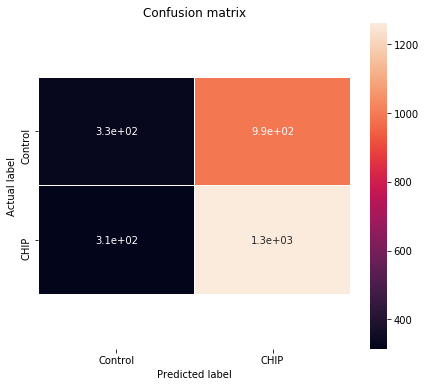

In [7]:
 y_preda = logreg.predict_proba(X_test) # calculate the probabilities for the test features
# print out the probability table with a header
print('Probability table for testing set is:')
print(y_preda)

y_pred=logreg.predict(X_test)

 from sklearn.metrics import confusion_matrix # import the confusion matrix function
cnf_matrix = confusion_matrix(y_test, y_pred) # create a confusion matrix for our actual and predicted values
# create a data frame from the confusion matrix with the column and row names being the class_names
class_names=['Control', 'CHIP'] # names of the binary classes for plotting
cmatrix = pd.DataFrame(cnf_matrix,columns=class_names,index=class_names) 
f, ax = plt.subplots(figsize=(7,6)) # initialise the plots and axes
sns.heatmap(cmatrix, annot=True, linewidths=.5) # plot the confusion matrix as a heatmap
plt.title('Confusion matrix') # add a title
plt.ylabel('Actual label') # add a ylabel
plt.xlabel('Predicted label') # add a xlabel
# adjust the bottom and top of the figure, so we can view all of it
bottom, top = ax.get_ylim()  # get the y axis limits
ax.set_ylim(bottom + 0.5, top - 0.5); # adjust the y axis limits

Accuracy: 0.549
Precision: 0.56
Recall: 0.801


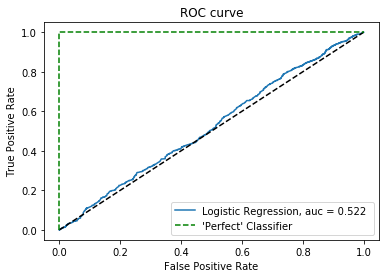

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score # import the score functions 
print("Accuracy:",np.round(accuracy_score(y_test, y_pred),3)) # calculate and print the accuracy score
print("Precision:",np.round(precision_score(y_test, y_pred),3)) # calculate and print the precision score
print("Recall:",np.round(recall_score(y_test, y_pred),3)) # calculate and print the recall score


 # import the functions to calculate the parameters for the ROC curve and the AUC
from sklearn.metrics import roc_curve, roc_auc_score 
y_pred_proba = logreg.predict_proba(X_test)[::,1] # extract the second column of the model probabilities 
# calculate the false positive and true positive rates as the threshold is varied, we don't use thresholds
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba) # calculate the area under the ROC curve (AUC)
# plot the FPR vs TPR and format label with AUC to 3 decimal places
plt.plot(fpr,tpr,label="Logistic Regression, auc = %0.3f " % auc)
plt.plot([0,1],[0,1],'k--') # plot x = y for comparison
plt.plot([0, 0, 1], [0, 1, 1], 'g--', label="'Perfect' Classifier")
plt.xlabel('False Positive Rate') # add xlabel
plt.ylabel('True Positive Rate') # add ylabel
plt.title('ROC curve') # add title
plt.legend(loc='best'); # add legend

In [9]:
X = df_chip2.drop(['chipOrControl', 'SYMBOL'],axis=1) # drop Y from our dataframe
y = df_chip2['chipOrControl'] # create a dataframe with just the Y values

X = (X-X.mean())/X.std()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8, random_state=1) 

from sklearn.linear_model import LogisticRegression # import the LogisticRegression model

logreg = LogisticRegression(solver='lbfgs',penalty='none')
logreg.fit(X_train,y_train) # fit the training data to the model
print('Model coefficients are',np.round(logreg.coef_,3)) # print the model coefficients c1,...,c4
print('Model intercept is',np.round(logreg.intercept_,3)) # print the model intercept c0

Model coefficients are [[-0.078 -0.053  0.039]]
Model intercept is [0.101]


Probability table for testing set is:
[[0.48450332 0.51549668]
 [0.47023793 0.52976207]
 [0.46852692 0.53147308]
 ...
 [0.46999654 0.53000346]
 [0.46910863 0.53089137]
 [0.46798857 0.53201143]]


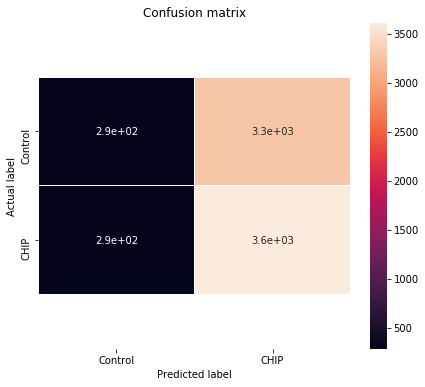

In [13]:
 y_preda = logreg.predict_proba(X_test) # calculate the probabilities for the test features
# print out the probability table with a header
print('Probability table for testing set is:')
print(y_preda)

y_pred=logreg.predict(X_test)

 from sklearn.metrics import confusion_matrix # import the confusion matrix function
cnf_matrix = confusion_matrix(y_test, y_pred) # create a confusion matrix for our actual and predicted values
# create a data frame from the confusion matrix with the column and row names being the class_names
class_names=['Control', 'CHIP'] # names of the binary classes for plotting
cmatrix = pd.DataFrame(cnf_matrix,columns=class_names,index=class_names) 
f, ax = plt.subplots(figsize=(7,6)) # initialise the plots and axes
sns.heatmap(cmatrix, annot=True, linewidths=.5) # plot the confusion matrix as a heatmap
plt.title('Confusion matrix') # add a title
plt.ylabel('Actual label') # add a ylabel
plt.xlabel('Predicted label') # add a xlabel
# adjust the bottom and top of the figure, so we can view all of it
bottom, top = ax.get_ylim()  # get the y axis limits
ax.set_ylim(bottom + 0.5, top - 0.5); # adjust the y axis limits

Accuracy: 0.522
Precision: 0.524
Recall: 0.926


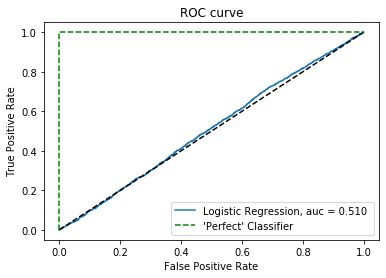

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score # import the score functions 
print("Accuracy:",np.round(accuracy_score(y_test, y_pred),3)) # calculate and print the accuracy score
print("Precision:",np.round(precision_score(y_test, y_pred),3)) # calculate and print the precision score
print("Recall:",np.round(recall_score(y_test, y_pred),3)) # calculate and print the recall score


 # import the functions to calculate the parameters for the ROC curve and the AUC
from sklearn.metrics import roc_curve, roc_auc_score 
y_pred_proba = logreg.predict_proba(X_test)[::,1] # extract the second column of the model probabilities 
# calculate the false positive and true positive rates as the threshold is varied, we don't use thresholds
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba) # calculate the area under the ROC curve (AUC)
# plot the FPR vs TPR and format label with AUC to 3 decimal places
plt.plot(fpr,tpr,label="Logistic Regression, auc = %0.3f " % auc)
plt.plot([0,1],[0,1],'k--') # plot x = y for comparison
plt.plot([0, 0, 1], [0, 1, 1], 'g--', label="'Perfect' Classifier")
plt.xlabel('False Positive Rate') # add xlabel
plt.ylabel('True Positive Rate') # add ylabel
plt.title('ROC curve') # add title
plt.legend(loc='best'); # add legend

## Decision Tree Stuff

In [ ]:
 # instantatiate the DTC, set random_state so results are repeatable
df_dtc = DecisionTreeClassifier(random_state = 4, max_depth = 3) 
df_dtc = df_dtc.fit(X_train, y_train) # train the model using the training set

In [ ]:
 fig, ax = plt.subplots(figsize=(10,9)) # initialise the plots and axes
# plot the decision tree for the model df_dtc
plot_tree(df_dtc, 
 filled = True, # colour the nodes according to the classifaction
 rounded = True, # make the nodes have rounded corners
 class_names = ['Class 1', 'Class 2','Class 3'], # use these names for targets
 feature_names = X.columns # use these names for features
 );

In [ ]:
Y_pred = df_dtc.predict(X_test) # calculate the predictions of the model for our test set
# plot the confusion matrix for the test and predicted target values
cm = confusion_matrix(y_test, Y_pred)
plt_confusion_matrix(cm, ['Positive','Negative'], 'Decision Tree') 
print("Decision Tree Accuracy:",np.round(accuracy_score(y_test, Y_pred),3)) # calculate and print the accuracy score

In [ ]:
 X = df_chip[['AF','V D']] # drop the target variable for the features
y = df_chip['chipOrControl'] # create a target dataframe
fig, ax = plt.subplots(figsize=(6,5)) # initialise the plots and axes
plt.scatter(X['AF'], X['VD'], c=y); # scatter plot of the two features, coloured based on the target
plt.xlabel('AF') # xlabel
plt.ylabel('VD') # ylabel

In [ ]:
# split the dataframes into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(10,9)) # initialise the plots and axes for a 2x2 set of plots
# create arrays for contour plots of the decision boundaries
xx, yy = np.meshgrid(np.linspace(0,6), np.linspace(200,1800))
for i in range(2): # i loops over (0,1)
    for j in range(2): # j loops over (0,1)
        depth = i*2+j+1 # depth can then be calculated based on i and j
        # fit the data to our DTC and specify the maximum depth of the tree
        df_dtc = DecisionTreeClassifier(random_state = 42, max_depth=depth).fit(X_train, y_train)
        # scatter plot of the two features, coloured based on the target, alpha set the transperancy
        # axs[i,j] is (i,j) set of the axes defined above
        axs[i,j].scatter(X['AF'], X['ODDRATIO'], c=y, alpha=0.3);
        plt_decision_boundaries(df_dtc, xx, yy, ax=axs[i,j], fill=False) # contour plot of the decision boundaries for this classifier
        Y_pred = df_dtc.predict(X_test) # calculate the predicted values
        accuracy = np.round(accuracy_score(y_test, Y_pred),3) # calculate the accuracy score
        # add the depth and accuracy to the title
        axs[i,j].set_title('depth = {0}, accuracy = {1}'.format(depth,accuracy)) 
        # only print axis labels on the left and bottom
        if i == 1:
            axs[i,j].set_xlabel('AF')
        if j == 0:
            axs[i,j].set_ylabel('ODDRATIO')

In [ ]:
df_chip.head()